In [261]:
#Import necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Just to check model score we import this
from sklearn.metrics import r2_score

In [262]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [263]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [264]:
input_cols = ['carat', 'depth', 'table']
target_col = 'price'
train_df = df[input_cols]
train_targets = df[target_col]

<Axes: xlabel='carat', ylabel='price'>

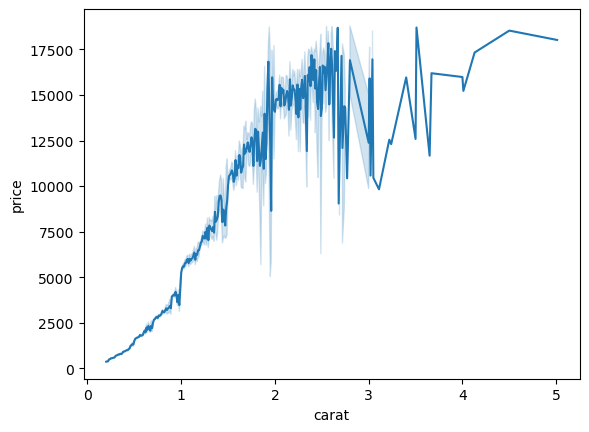

In [265]:
sns.lineplot(data = df, x= 'carat', y='price')

<Axes: xlabel='depth', ylabel='price'>

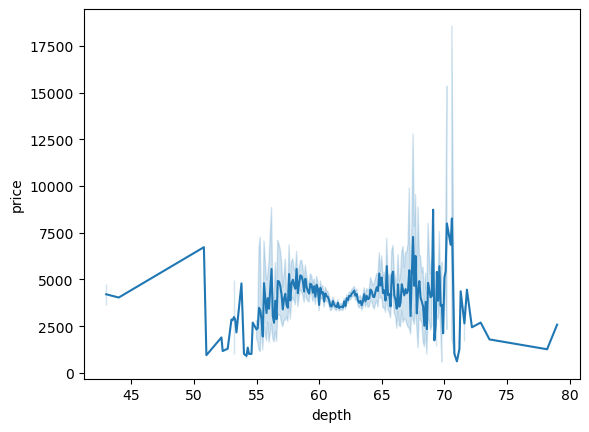

In [266]:
sns.lineplot(data = df, x= 'depth', y='price')

<Axes: xlabel='table', ylabel='price'>

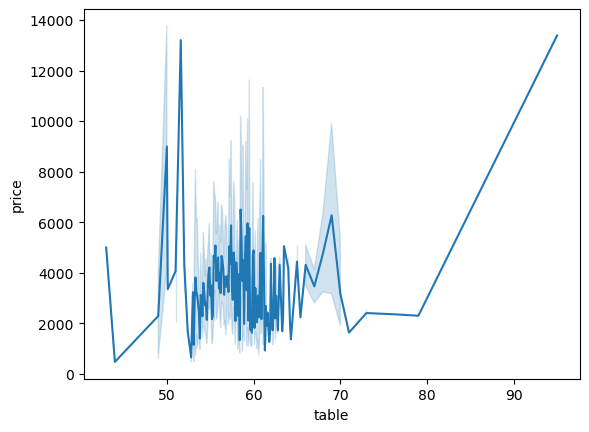

In [267]:
sns.lineplot(data = df, x= 'table', y='price')

In [268]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
dtypes: float64(3)
memory usage: 1.2 MB


In [269]:
train_targets.info()

<class 'pandas.core.series.Series'>
RangeIndex: 53940 entries, 0 to 53939
Series name: price
Non-Null Count  Dtype
--------------  -----
53940 non-null  int64
dtypes: int64(1)
memory usage: 421.5 KB


In [270]:
class LinearRegression:
  #getting the parameters right
  def fit(self,input, targets):
    input = np.array(input)
    targets = np.array(targets)
    
    rows, inputs = input.shape
    self.weights = np.zeros(inputs)
    self.bias = 0
    self.learning_rate = 0.0001
    self.n_iterations = 1000
    self.Losses = []

    #Setting up stochastic gradient descent
    for i in range(self.n_iterations):
      pred = np.dot(input,self.weights) + self.bias

      #Compute the error of each iteration(use Mean squared error)
      loss = np.mean(np.square(targets - pred))
      self.Losses.append(loss)

      #Improve the weights and biases for the linear model using gradient descent

      self.weights -= self.learning_rate * (2/rows) * np.dot(input.T, (pred - targets))
      self.bias-= self.learning_rate * (2/rows) * np.sum(pred - targets)

  #Seting up the predict function
  def predict(self,inputs):
    return np.dot(inputs, self.weights) + self.bias

In [271]:
model = LinearRegression()

In [272]:
model.fit(train_df,train_targets)

In [273]:
preds = model.predict(train_df)
preds

array([3498.28898775, 4185.29981647, 4721.89623761, ..., 4131.50601482,
       4044.4631226 , 3647.11525589], shape=(53940,))

In [274]:
train_targets

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [275]:
preds

array([3498.28898775, 4185.29981647, 4721.89623761, ..., 4131.50601482,
       4044.4631226 , 3647.11525589], shape=(53940,))

In [276]:
np.array(train_targets)

array([ 326,  326,  327, ..., 2757, 2757, 2757], shape=(53940,))

In [277]:
score = r2_score(train_targets,preds)
score

0.08259212956897832

## Right now our model is pretty bad as our R2 score is 0.08, we'll try to fix this later